# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Perkenalan Dataset

Dataset ini digunakan untuk mempelajari dan memprediksi harga rumah berdasarkan beberapa karakteristik properti, seperti luas bangunan, jumlah kamar tidur, kondisi furnitur, serta kedekatan dengan jalan utama. Meskipun jumlah data relatif kecil, dataset ini tetap menantang karena memiliki multikolinearitas yang kuat antar fitur, yang dapat memengaruhi stabilitas dan interpretasi model regresi.

Dataset ini sangat cocok digunakan sebagai studi kasus untuk memahami bagaimana hubungan antar variabel independen dapat memengaruhi performa model prediktif, serta bagaimana teknik statistik dan machine learning dapat digunakan untuk mengatasinya.

**Latar Belakang**

Harga rumah merupakan salah satu indikator penting dalam sektor properti dan perencanaan wilayah. Dengan meningkatnya kebutuhan akan hunian di wilayah perkotaan Indonesia, kemampuan untuk memprediksi harga rumah secara akurat menjadi semakin relevan, baik bagi pengembang, investor, maupun pembeli rumah.

Dataset ini terinspirasi dari penelitian klasik mengenai hedonic pricing, yang menjelaskan bahwa harga properti ditentukan oleh kumpulan atribut atau karakteristik yang dimilikinya.

**Tantangan Dataset**

Tantangan utama dalam dataset ini adalah adanya multikolinearitas, yaitu kondisi ketika dua atau lebih variabel independen saling berkorelasi kuat. Hal ini dapat menyebabkan:

Koefisien regresi menjadi tidak stabil

Interpretasi model menjadi kurang akurat

Performa model yang menurun jika tidak ditangani dengan baik

Oleh karena itu, diperlukan pendekatan analisis dan pemodelan yang tepat untuk menghasilkan model prediksi yang andal.

**Source:https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download** 


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries imported")

Libraries imported


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv("../housing_raw/housing.csv")
df.head()

print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

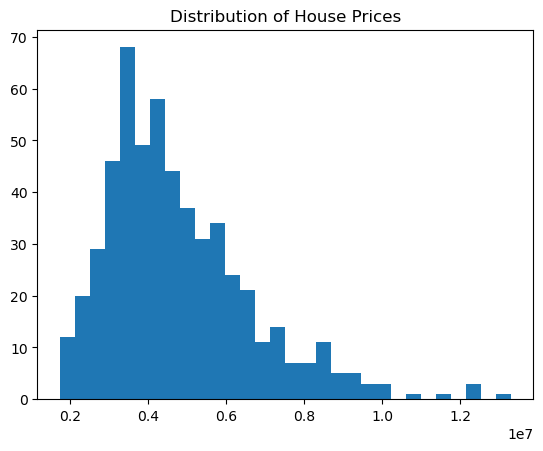

In [5]:
plt.hist(df["price"], bins=30)
plt.title("Distribution of House Prices")
plt.show()

In [6]:
df.select_dtypes(include="object").columns
df.select_dtypes(exclude="object").columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
X = df.drop("price", axis=1)
y = df["price"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_processed.shape


(545, 13)

In [8]:
df_processed = pd.DataFrame(X_processed)
df_processed['price'] = y.values

df_processed.to_csv("housing_preprocessed.csv", index=False)
print("Preprocessed data saved to housing_preprocessed.csv")

Preprocessed data saved to housing_preprocessed.csv
